# The Evolution of the NBA Game: From Physical Giants to the Era of Shooters

## Analysis of the NBA's stylistic evolution from 1980 to today

This notebook will graphically show the transformation of NBA basketball through data, showing the shift from the physical dominance of the 80s-90s to the modern technical and perimeter-oriented game.

In [1]:
# Import of the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import kagglehub

path = kagglehub.dataset_download("sumitrodatta/nba-aba-baa-stats")

# Graph configuration
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12



100%|██████████| 10.7M/10.7M [00:00<00:00, 60.6MB/s]

Extracting files...


In [2]:
# Dataset loading
df = pd.read_csv(path+"/Team Totals.csv")

In [3]:
# Filter NBA data from 1980 onwards (introduction of 3 point shoot)
df_clean = df[(df['lg'] == 'NBA') & (df['season'] >= 1980)].copy()

# Removal of missing values in selected key columns
key_columns = ['season', 'fg', 'fga', 'fg_percent', 'x3p', 'x3pa', 'x3p_percent', 'x2p', 'x2pa', 'x2p_percent']
df_clean = df_clean.dropna(subset=key_columns)

# Creation of decades
df_clean['decade'] = (df_clean['season'] // 10) * 10
df_clean['decade_label'] = df_clean['decade'].astype(str) + 's' # 1980s, 1990s, 2000s, ... add of s at the end of year

print(f"Decades covered: {sorted(df_clean['decade_label'].unique())}")

Decades covered: ['1980s', '1990s', '2000s', '2010s', '2020s']


## Chapter 1: The Three-Point Shot Revolution

The three-point shot was introduced in the NBA in the 1979-80 season. Let's analyze how its use has evolved over time.

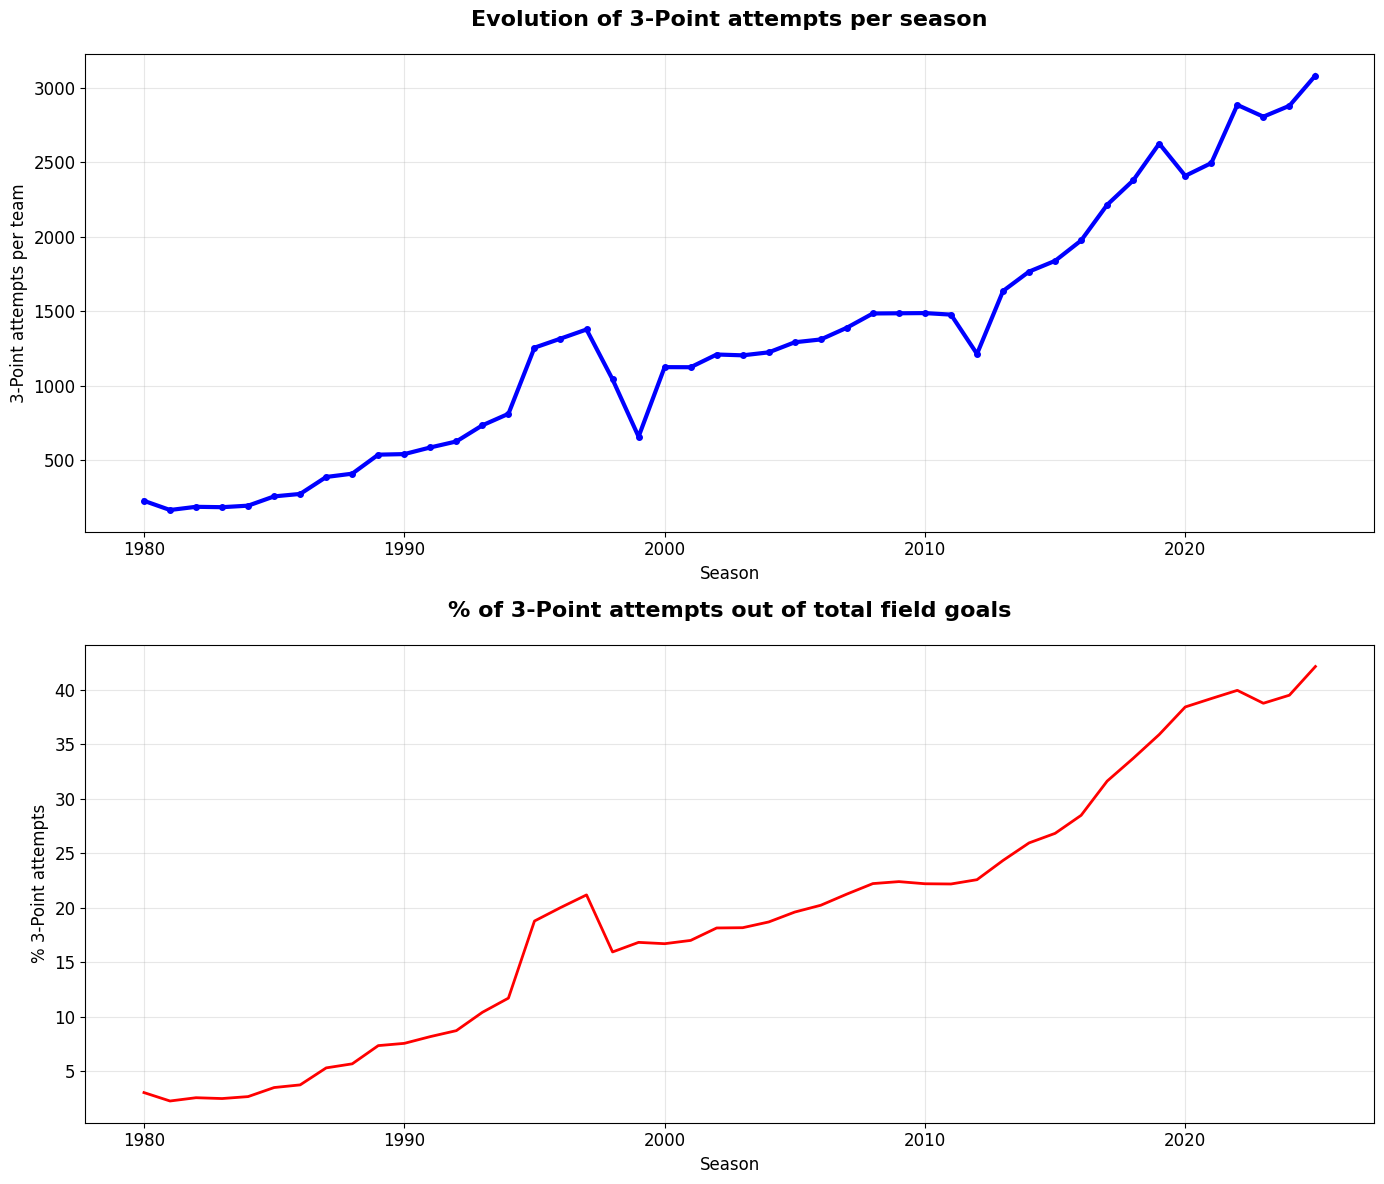

KEY STATISTICS:
3-point attempts in 1980: 227.4 per team per season
3-point attempts in 2020: 2408.4 per team per season
Increase: 959%


In [4]:
# Aggregation of data by season
season_stats = df_clean.groupby('season').agg({
    'x3p': 'mean',
    'x3pa': 'mean',
    'x3p_percent': 'mean',
    'fg': 'mean',
    'fga': 'mean',
    'fg_percent': 'mean',
    'x2p': 'mean',
    'x2pa': 'mean',
    'x2p_percent': 'mean'
}).reset_index()

# Calculation of aggregate percentages
season_stats['x3p_percentage_of_total_attempts'] = (season_stats['x3pa'] / season_stats['fga']) * 100

# Creation of the main chart
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# Chart 1: 3-point attempts per season
ax1.plot(season_stats['season'], season_stats['x3pa'], 'b-', linewidth=3, marker='o', markersize=4)
ax1.set_title('Evolution of 3-Point attempts per season', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Season', fontsize=12)
ax1.set_ylabel('3-Point attempts per team', fontsize=12)
ax1.grid(True, alpha=0.3)

# Chart 2: Percentage of 3-point attempts out of total shots
ax2.plot(season_stats['season'], season_stats['x3p_percentage_of_total_attempts'], 'r-', linewidth=2)
ax2.set_title('% of 3-Point attempts out of total field goals', fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Season', fontsize=12)
ax2.set_ylabel('% 3-Point attempts', fontsize=12)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print some key statistics
print("KEY STATISTICS:")
print(f"3-point attempts in 1980: {season_stats[season_stats['season']==1980]['x3pa'].iloc[0]:.1f} per team per season")
print(f"3-point attempts in 2020: {season_stats[season_stats['season']==2020]['x3pa'].iloc[0]:.1f} per team per season")
print(f"Increase: {((season_stats[season_stats['season']==2020]['x3pa'].iloc[0] / season_stats[season_stats['season']==1980]['x3pa'].iloc[0]) - 1) * 100:.0f}%")

## Chapter 2: Efficiency vs. Volume - The Change in Strategy

Let's analyze how the relationship between 2-point and 3-point shots has changed, and the overall efficiency.

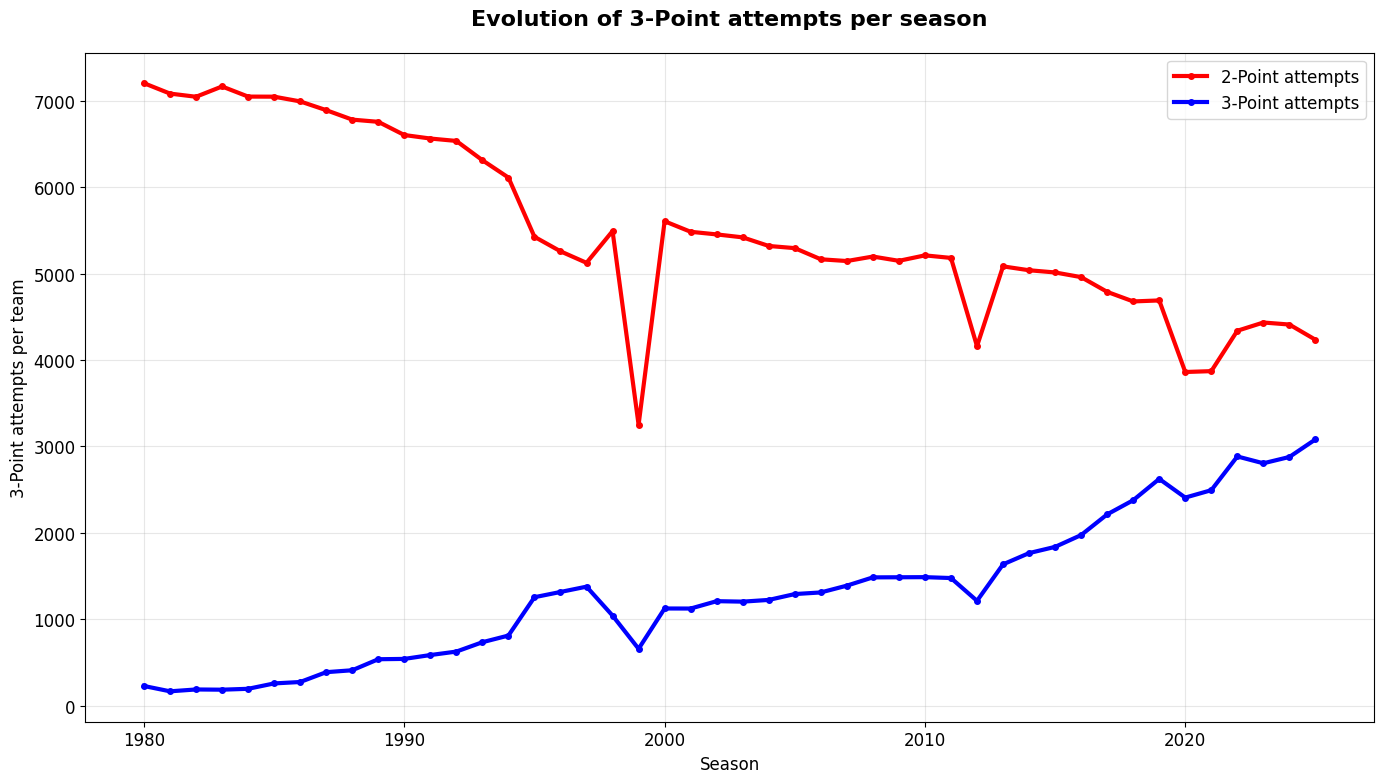

2-point attempts in 1980: 7205.3 per team per season
2-point attempts in 2020: 3862.1 per team per season
3-point attempts in 1980: 227.4 per team per season
3-point attempts in 2020: 2408.4 per team per season


In [5]:
# Creation of a stacked area chart to show the distribution of 2P vs 3P

fig, ax = plt.subplots(figsize=(14, 8))

season_stats['x2p_percentage_of_total_attempts'] = (season_stats['x2pa'] / season_stats['fga']) * 100

ax.plot(season_stats['season'], season_stats['x2pa'], 'r-', label='2-Point attempts', linewidth=3, marker='o', markersize=4)  # Red = 2P
ax.plot(season_stats['season'], season_stats['x3pa'], 'b-', label='3-Point attempts', linewidth=3, marker='o', markersize=4)  # Blue = 3P
ax.set_title('Evolution of 3-Point attempts per season', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Season', fontsize=12)
ax.set_ylabel('3-Point attempts per team', fontsize=12)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"2-point attempts in 1980: {season_stats[season_stats['season']==1980]['x2pa'].iloc[0]:.1f} per team per season")
print(f"2-point attempts in 2020: {season_stats[season_stats['season']==2020]['x2pa'].iloc[0]:.1f} per team per season")
print(f"3-point attempts in 1980: {season_stats[season_stats['season']==1980]['x3pa'].iloc[0]:.1f} per team per season")
print(f"3-point attempts in 2020: {season_stats[season_stats['season']==2020]['x3pa'].iloc[0]:.1f} per team per season")


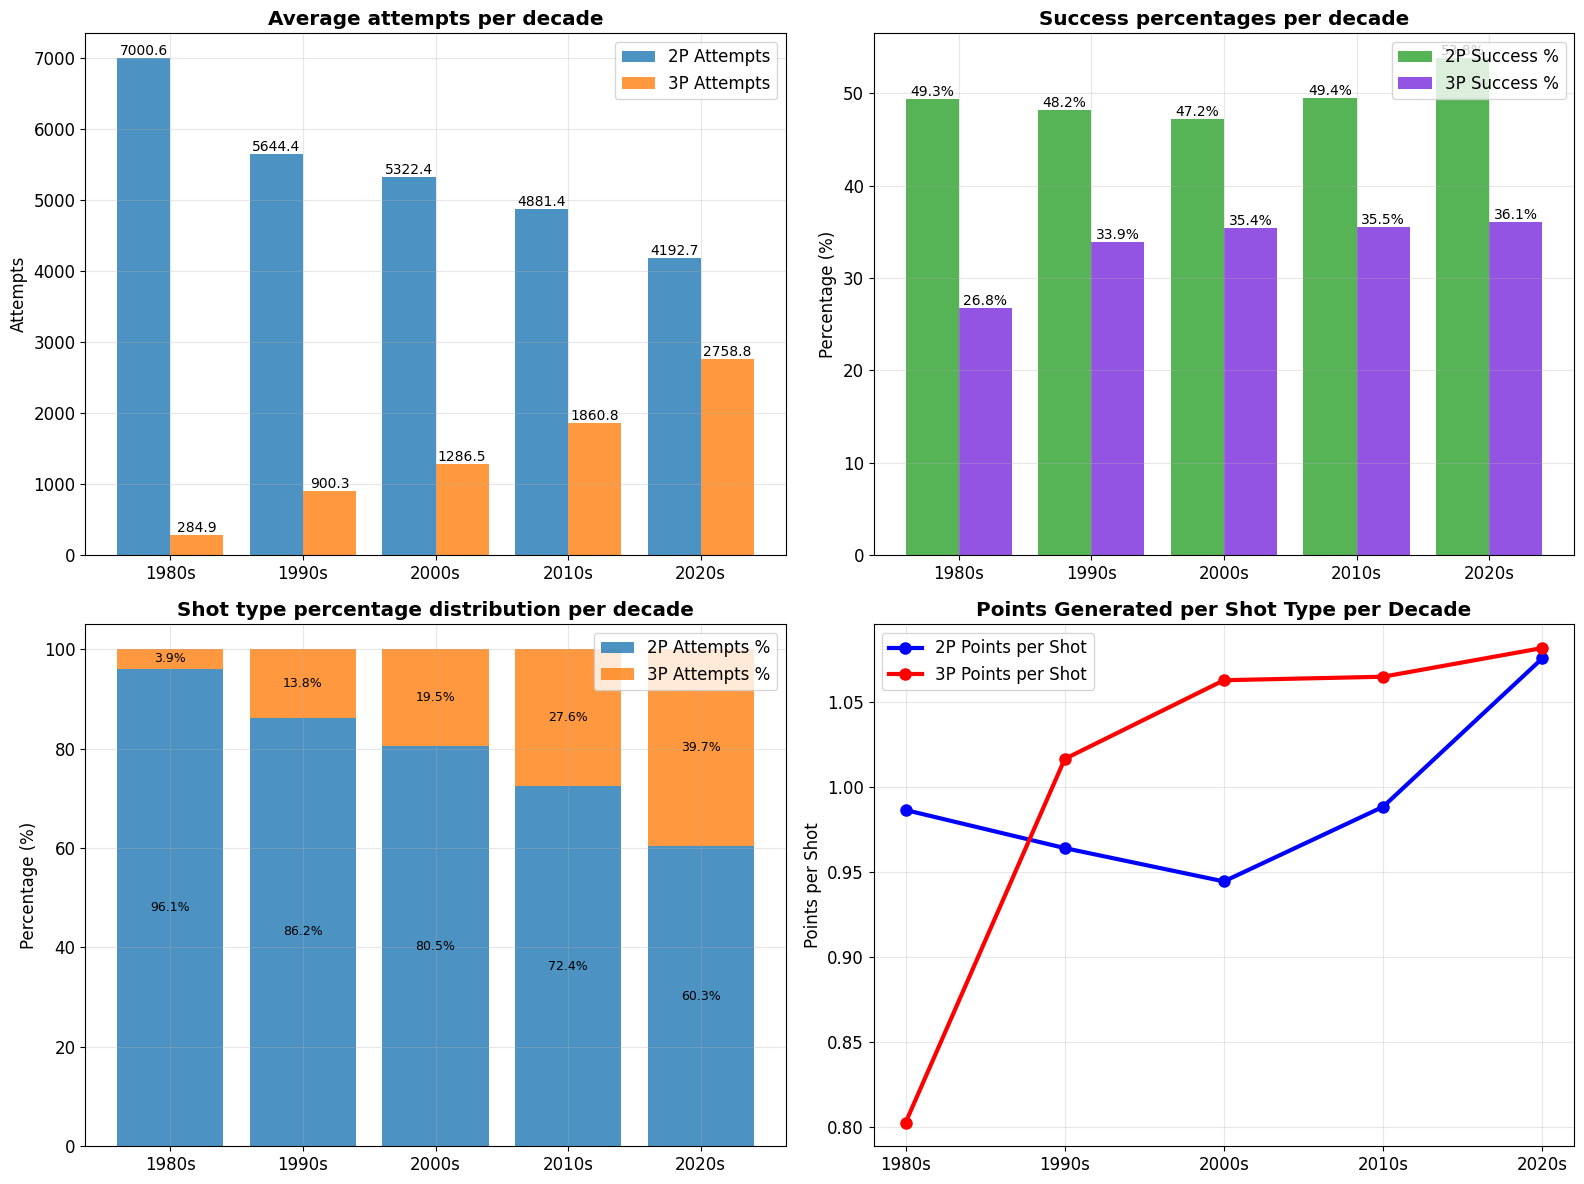

EVOLUTION BY DECADE:
1980s: 3.9% of total attempts were 3P, 26.8% success rate, 3P attempts = 284.9, total attempts = 7285.5
1990s: 13.8% of total attempts were 3P, 33.9% success rate, 3P attempts = 900.3, total attempts = 6544.8
2000s: 19.5% of total attempts were 3P, 35.4% success rate, 3P attempts = 1286.5, total attempts = 6608.9
2010s: 27.6% of total attempts were 3P, 35.5% success rate, 3P attempts = 1860.8, total attempts = 6742.3
2020s: 39.7% of total attempts were 3P, 36.1% success rate, 3P attempts = 2758.8, total attempts = 6951.5


In [6]:
# Analysis by decade
decade_stats = df_clean.groupby('decade_label').agg({
    'x3p': 'mean',
    'x3pa': 'mean',
    'x3p_percent': 'mean',
    'x2p': 'mean',
    'x2pa': 'mean',
    'x2p_percent': 'mean',
    'fg': 'mean',
    'fga': 'mean',
    'fg_percent': 'mean'
}).reset_index()

decade_stats['x2p_percentage_of_total_attempts'] = (decade_stats['x2pa'] / decade_stats['fga']) * 100
decade_stats['x3p_percentage_of_total_attempts'] = (decade_stats['x3pa'] / decade_stats['fga']) * 100

# Bar chart for decade comparison
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Average attempts per decade
width = 0.4
x = np.arange(len(decade_stats))

bar_2p = ax1.bar(x - width/2, decade_stats['x2pa'], width, label='2P Attempts', color='#1f77b4', alpha=0.8)
bar_3p = ax1.bar(x + width/2, decade_stats['x3pa'], width, label='3P Attempts', color='#ff7f0e', alpha=0.8)
ax1.set_title('Average attempts per decade', fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(decade_stats['decade_label'])
ax1.set_ylabel('Attempts')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Add values on top of the bars
# For 2p attempts (bar_2p)
for bar in bar_2p.patches: # Iterate through all bars in bar_2p
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}', ha='center', va='bottom', fontsize=10)

# For 3p attempts (bar_3p)
for bar in bar_3p.patches: # Iterate through all bars in bar_3p
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}', ha='center', va='bottom', fontsize=10)

# Success percentages per decade
bar_2p_pct_succ = ax2.bar(x - width/2, decade_stats['x2p_percent']*100, width, label='2P Success %', color='#2ca02c', alpha=0.8)
bar_3p_pct_succ = ax2.bar(x + width/2, decade_stats['x3p_percent']*100, width, label='3P Success %', color='#7828dc', alpha=0.8)
ax2.set_title('Success percentages per decade', fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(decade_stats['decade_label'])
ax2.set_ylabel('Percentage (%)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Add values on top of the bars
# For 2p success percentages over decades (bar_2p_pct_succ)
for bar in bar_2p_pct_succ.patches: # Iterate through all bars in bar_2p_pct_succ
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

# For 3p success percentages over decades (bar_3p_pct_succ)
for bar in bar_3p_pct_succ.patches: # Iterate through all bars in bar_3p_pct_succ
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=10)


# Stacked bar chart for percent of 2pa and 3pa
bar_2p_pct = ax3.bar(decade_stats['decade_label'], decade_stats['x2p_percentage_of_total_attempts'], label='2P Attempts %', color='#1f77b4', alpha=0.8)
bar_3p_pct = ax3.bar(decade_stats['decade_label'], decade_stats['x3p_percentage_of_total_attempts'], bottom=decade_stats['x2p_percentage_of_total_attempts'], label='3P Attempts %', color='#ff7f0e', alpha=0.8)
ax3.set_title('Shot type percentage distribution per decade', fontweight='bold')
ax3.set_ylabel('Percentage (%)')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Add values inside of the bars
# For 2p attempt percentages over decades (bar_2p_pct)
for bar in bar_2p_pct.patches:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., bar.get_y() + height/2, # Put text in the middle of the stacked bar
              f'{height:.1f}%', # Format as percentage
              ha='center', va='center', fontsize=9)

# For 3p attempt percentages over decades (bar_3p_pct)
for bar in bar_3p_pct.patches:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., bar.get_y() + height/2, # Position text in the middle of the bar segment
              f'{height:.1f}%', # Format as percentage
              ha='center', va='center', fontsize=9)

# Evolution of points per shot for type
ax4.plot(decade_stats['decade_label'], decade_stats['x2p_percent'] * 2,
         'b-', marker='o', linewidth=3, markersize=8, label='2P Points per Shot')
ax4.plot(decade_stats['decade_label'], decade_stats['x3p_percent'] * 3,
         'r-', marker='o', linewidth=3, markersize=8, label='3P Points per Shot')
ax4.set_title('Points Generated per Shot Type per Decade', fontweight='bold')
ax4.set_ylabel('Points per Shot')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics per decade
print("EVOLUTION BY DECADE:")
for _, row in decade_stats.iterrows():
    print(f"{row['decade_label']}: {row['x3p_percentage_of_total_attempts']:.1f}% of total attempts were 3P, "
          f"{row['x3p_percent']*100:.1f}% success rate, 3P attempts = {row['x3pa']:.1f}, total attempts = {row['fga']:.1f}")

## Chapter 3: The Transition - Direct Comparison of the Physical Era vs. Technical Era

Let's directly compare two emblematic periods: the 80s-90s (physical era) versus the 2010s-2020s (technical era).

In [7]:
# Definition of eras
era_physical = df_clean[(df_clean['season'] >= 1980) & (df_clean['season'] <= 1999)]
era_technical = df_clean[(df_clean['season'] >= 2010)]

# Calculation of average stats per era
stats_physical = {
    'x3p_avg': era_physical['x3p'].mean(),
    'x3pa_avg': era_physical['x3pa'].mean(),
    'x3p_percent': era_physical['x3p_percent'].mean(),
    'x2p_avg': era_physical['x2p'].mean(),
    'x2pa_avg': era_physical['x2pa'].mean(),
    'x2p_percent': era_physical['x2p_percent'].mean(),
    'fg_avg': era_physical['fg'].mean(),
    'fga_avg': era_physical['fga'].mean(),
    'fg_percent': era_physical['fg_percent'].mean()
}

stats_technical = {
    'x3p_avg': era_technical['x3p'].mean(),
    'x3pa_avg': era_technical['x3pa'].mean(),
    'x3p_percent': era_technical['x3p_percent'].mean(),
    'x2p_avg': era_technical['x2p'].mean(),
    'x2pa_avg': era_technical['x2pa'].mean(),
    'x2p_percent': era_technical['x2p_percent'].mean(),
    'fg_avg': era_technical['fg'].mean(),
    'fga_avg': era_technical['fga'].mean(),
    'fg_percent': era_technical['fg_percent'].mean()
}

# Calculating shot type proportions
stats_physical['x2p_percentage_of_total_attempts_physical'] = (stats_physical['x2pa_avg'] / stats_physical['fga_avg']) * 100
stats_physical['x3p_percentage_of_total_attempts_physical'] = (stats_physical['x3pa_avg'] / stats_physical['fga_avg']) * 100
stats_technical['x2p_percentage_of_total_attempts_technical'] = (stats_technical['x2pa_avg'] / stats_technical['fga_avg']) * 100
stats_technical['x3p_percentage_of_total_attempts_technical'] = (stats_technical['x3pa_avg'] / stats_technical['fga_avg']) * 100

# Radar chart comparison setup
categories = ['3P attempts (%)', '3P success (%)', '2P attempts (%)', '2P success (%)']

# Values to plot
physical_values = [
    stats_physical['x3p_percentage_of_total_attempts_physical'],
    stats_physical['x3p_percent'] * 100,
    stats_physical['x2p_percentage_of_total_attempts_physical'],
    stats_physical['x2p_percent'] * 100
]

technical_values = [
    stats_technical['x3p_percentage_of_total_attempts_technical'],
    stats_technical['x3p_percent'] * 100,
    stats_technical['x2p_percentage_of_total_attempts_technical'],
    stats_technical['x2p_percent'] * 100
]

# Radar chart configuration
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=physical_values,
    theta=categories,
    fill='toself',
    name='Physical Era (1980–1999)',
    line=dict(color='#1f77b4'),
    fillcolor='rgba(31, 119, 180, 0.3)'
))

fig.add_trace(go.Scatterpolar(
    r=technical_values,
    theta=categories,
    fill='toself',
    name='Technical Era (2010–2023)',
    line=dict(color='#ff7f0e'),
    fillcolor='rgba(255, 127, 14, 0.3)'
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 100]
        )),
    showlegend=True,
    title="Direct Comparison: Physical Era vs Technical Era",
    font=dict(size=12),
    height=600
)

fig.show()

# Output stats for each era
print("COMPARISON BETWEEN ERAS:")
print(f"3-point attempts percentage in Physical Era: {stats_physical['x3p_percentage_of_total_attempts_physical']:.1f}% of total attempts")
print(f"3-point attempts percentage in Technical Era: {stats_technical['x3p_percentage_of_total_attempts_technical']:.1f}% of total attempts")
print(f"3-point success rate in Physical Era: {stats_physical['x3p_percent']*100:.1f}%")
print(f"3-point success rate in Technical Era: {stats_technical['x3p_percent']*100:.1f}%")
print(f"2-point attempts percentage in Physical Era: {stats_physical['x2p_percentage_of_total_attempts_physical']:.1f}% of total attempts")
print(f"2-point attempts percentage in Technical Era: {stats_technical['x2p_percentage_of_total_attempts_technical']:.1f}% of total attempts")
print(f"2-point success rate in Physical Era: {stats_physical['x2p_percent']*100:.1f}%")
print(f"2-point success rate in Technical Era: {stats_technical['x2p_percent']*100:.1f}%")

COMPARISON BETWEEN ERAS:
3-point attempts percentage in Physical Era: 9.0% of total attempts
3-point attempts percentage in Technical Era: 32.2% of total attempts
3-point success rate in Physical Era: 30.6%
3-point success rate in Technical Era: 35.7%
2-point attempts percentage in Physical Era: 91.0% of total attempts
2-point attempts percentage in Technical Era: 67.8% of total attempts
2-point success rate in Physical Era: 48.7%
2-point success rate in Technical Era: 51.1%


## Chapter 4: The Impact on Efficiency - More 3-Pointers = More Points?

Let's analyze whether the increase in 3-point shots has effectively improved teams' offensive efficiency.

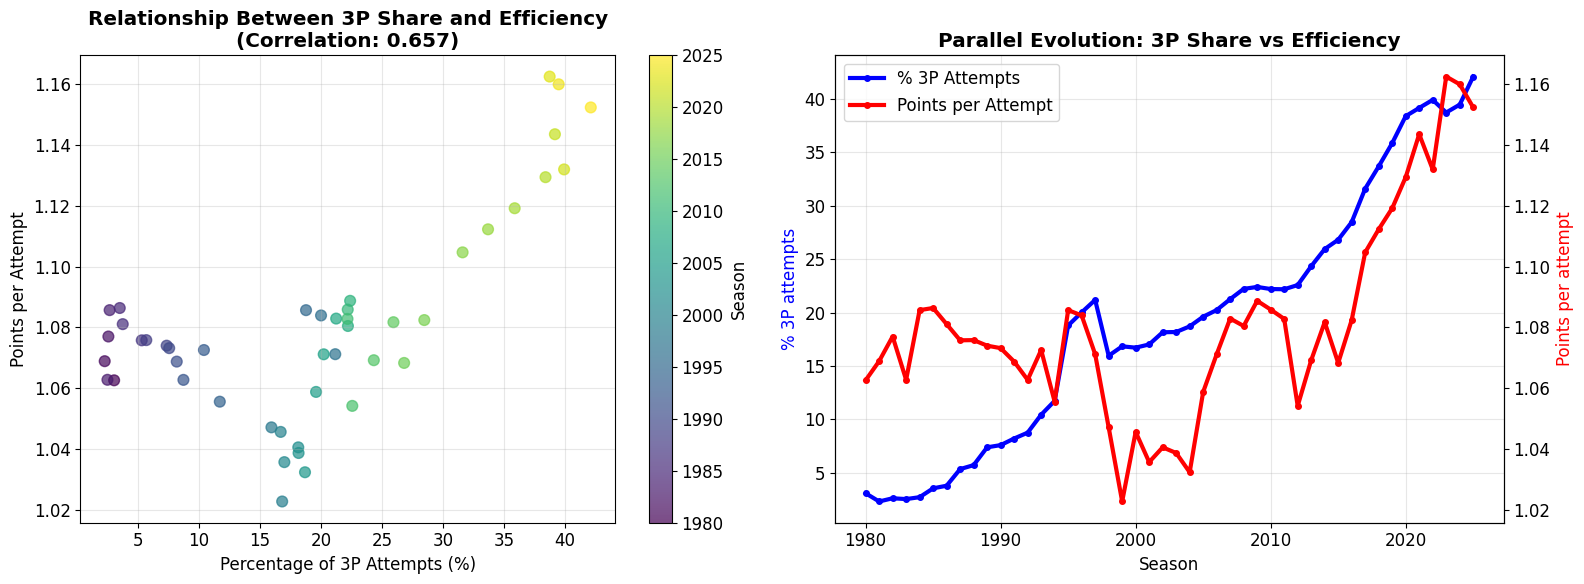

EFFICIENCY ANALYSIS:
Correlation between 3P share and points per attempt: 0.657
Efficiency in 1980: 1.063 points per attempt
Efficiency in 2020: 1.129 points per attempt
Efficiency improvement: 6.3%


In [8]:
season_efficiency = df_clean.groupby('season').agg({
    'x3p': 'sum',
    'x3pa': 'sum',
    'x2p': 'sum',
    'x2pa': 'sum',
    'fga': 'sum',
    'fta': 'sum',
    'pts': 'sum'
}).reset_index()

TSA = season_efficiency['fga'] + 0.44 * season_efficiency['fta']  # True Shooting Attempts, 0.44 is an empirical factor, accounting for the average FTAs that come from actual ball possession

season_efficiency['points_per_attempt'] = season_efficiency['pts'] / TSA
season_efficiency['x3p_percentage_of_total_attempts'] = (season_efficiency['x3pa'] / season_efficiency['fga']) * 100

# Correlation between 3P attempt share and efficiency
correlation = season_efficiency['x3p_percentage_of_total_attempts'].corr(season_efficiency['points_per_attempt'])

# Scatter plot to show the relationship
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot: 3P share vs efficiency
scatter = ax1.scatter(season_efficiency['x3p_percentage_of_total_attempts'], season_efficiency['points_per_attempt'],
                      c=season_efficiency['season'], cmap='viridis', s=60, alpha=0.7)
ax1.set_xlabel('Percentage of 3P Attempts (%)')
ax1.set_ylabel('Points per Attempt')
ax1.set_title(f'Relationship Between 3P Share and Efficiency\n(Correlation: {correlation:.3f})', fontweight='bold')
ax1.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax1, label='Season')

# Time evolution of both metrics
ax2_twin = ax2.twinx()

line1 = ax2.plot(season_efficiency['season'], season_efficiency['x3p_percentage_of_total_attempts'],
                 'b-', linewidth=3, marker='o', markersize=4, label='% 3P Attempts')  # BLUE
line2 = ax2_twin.plot(season_efficiency['season'], season_efficiency['points_per_attempt'],
                      'r-', linewidth=3, marker='o', markersize=4, label='Points per Attempt')  # RED

ax2.set_xlabel('Season')
ax2.set_ylabel('% 3P attempts', color='blue')
ax2_twin.set_ylabel('Points per attempt', color='red')
ax2.set_title('Parallel Evolution: 3P Share vs Efficiency', fontweight='bold')
ax2.grid(True, alpha=0.3)

# Combined legend
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax2.legend(lines, labels, loc='upper left')

plt.tight_layout()
plt.show()

print(f"EFFICIENCY ANALYSIS:")
print(f"Correlation between 3P share and points per attempt: {correlation:.3f}")
print(f"Efficiency in 1980: {season_efficiency[season_efficiency['season']==1980]['points_per_attempt'].iloc[0]:.3f} points per attempt")
print(f"Efficiency in 2020: {season_efficiency[season_efficiency['season']==2020]['points_per_attempt'].iloc[0]:.3f} points per attempt")
improvement = ((season_efficiency[season_efficiency['season']==2020]['points_per_attempt'].iloc[0] /
                season_efficiency[season_efficiency['season']==1980]['points_per_attempt'].iloc[0]) - 1) * 100
print(f"Efficiency improvement: {improvement:.1f}%")


## Chapter 5: Case Study - The Curry Era

Let's analyze the specific impact of the Stephen Curry era on league numbers.

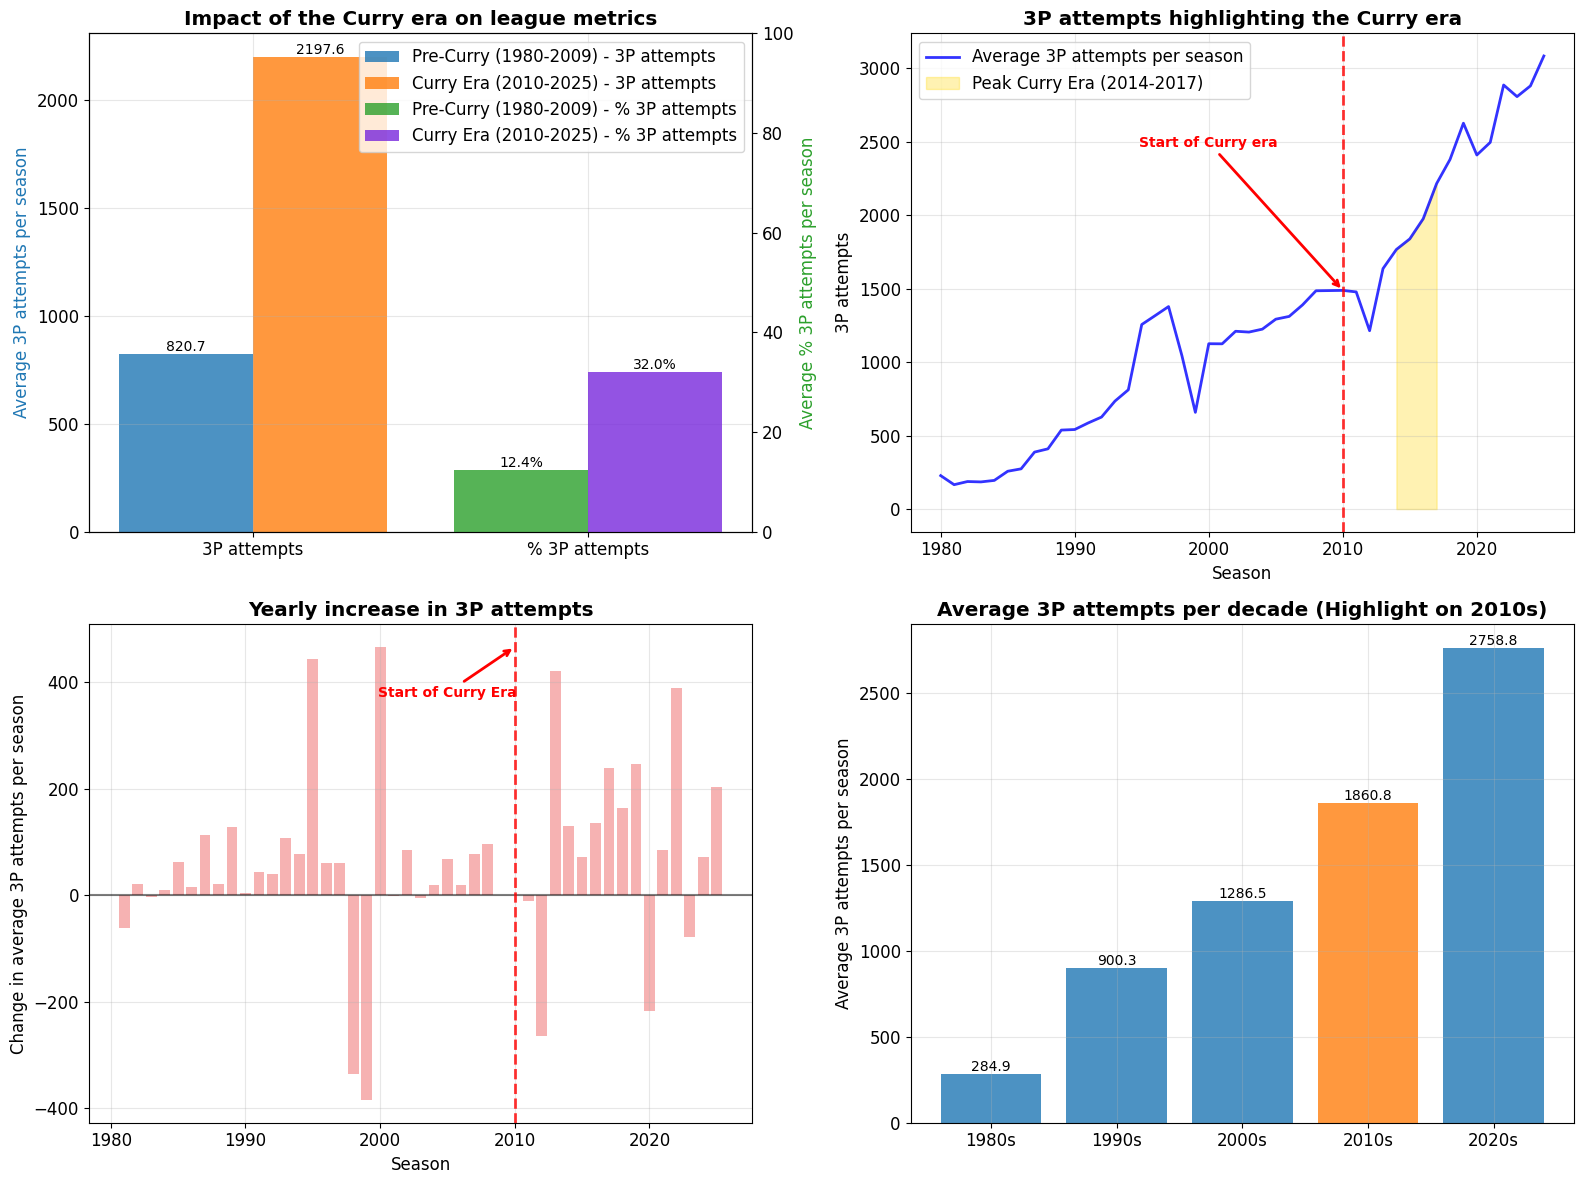

THE IMPACT OF THE CURRY ERA:
Average 3P attempts pre-Curry: 820.7 per team
Average 3P attempts Curry era: 2197.6 per team
3P Share pre-Curry: 12.4% of total attempts
3P Share Curry Era: 32.0% of total attempts
Increase in 3P Share: +19.6 percentage points


In [9]:
# Definition of pre, post and peak Curry seasons
pre_curry_seasons = season_stats[season_stats['season'] < 2010]
post_curry_seasons = season_stats[season_stats['season'] >= 2010]
curry_peak = season_stats[(season_stats['season'] >= 2014) & (season_stats['season'] <= 2017)]  # Peak years for Curry (2015-2016 record season)

# Calculate mean for pre and post seasons
pre_curry = {
    'x3pa': pre_curry_seasons['x3pa'].mean(),
    'x3p_percent_total': pre_curry_seasons['x3p_percentage_of_total_attempts'].mean()
}

post_curry = {
    'x3pa': post_curry_seasons['x3pa'].mean(),
    'x3p_percent_total': post_curry_seasons['x3p_percentage_of_total_attempts'].mean()
}

# Visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Graph 1: Pre vs Post Curry (3P Attempts and % 3P Attempts)
categories = ['3P attempts', '% 3P attempts']

x = np.arange(len(categories))
width = 0.40

ax1_twin = ax1.twinx()

# Bars for 3P attempts
bars1_3pa = ax1.bar(x[0] - width/2, pre_curry['x3pa'], width, label='Pre-Curry (1980-2009) - 3P attempts',
                color='#1f77b4', alpha=0.8)
bars2_3pa = ax1.bar(x[0] + width/2, post_curry['x3pa'], width, label='Curry Era (2010-2025) - 3P attempts',
                color='#ff7f0e', alpha=0.8)

# Bars for 3P percentage on secondary axis
bars1_pct = ax1_twin.bar(x[1] - width/2, pre_curry['x3p_percent_total'], width, label='Pre-Curry (1980-2009) - % 3P attempts',
                 color='#2ca02c', alpha=0.8)
bars2_pct = ax1_twin.bar(x[1] + width/2, post_curry['x3p_percent_total'], width, label='Curry Era (2010-2025) - % 3P attempts',
                 color='#7828dc', alpha=0.8)

ax1.set_title('Impact of the Curry era on league metrics', fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
ax1.set_ylabel('Average 3P attempts per season', color='#1f77b4')
ax1_twin.set_ylabel('Average % 3P attempts per season', color='#2ca02c')
ax1_twin.set_ylim(0, 100)  # Set the limit for the secondary y-axis

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines_twin, labels_twin = ax1_twin.get_legend_handles_labels()
ax1.legend(lines + lines_twin, labels + labels_twin, loc='upper right')

ax1.grid(True, alpha=0.3)

# Add values to the bars
# For bars1_3pa
for bar in bars1_3pa.patches: # Iterate through all bars in bars1_3pa
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}', ha='center', va='bottom', fontsize=10)

# For bars2_3pa
for bar in bars2_3pa.patches: # Iterate through all bars in bars2_3pa
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}', ha='center', va='bottom', fontsize=10)

# For bars1_pct
for bar in bars1_pct.patches: # Iterate through all bars in bars1_pct
    height = bar.get_height()
    ax1_twin.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

# For bars2_pct
for bar in bars2_pct.patches: # Iterate through all bars in bars2_pct
    height = bar.get_height()
    ax1_twin.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

# Graph 2: Timeline highlighting Curry period (3P Attempts per team per season)
ax2.plot(season_stats['season'], season_stats['x3pa'],
         'b-', label='Average 3P attempts per season', linewidth=2, alpha=0.8)
ax2.fill_between(curry_peak['season'], curry_peak['x3pa'],
                 alpha=0.3, color='gold', label='Peak Curry Era (2014-2017)')
ax2.axvline(x=2010, color='red', linestyle='--', alpha=0.8, linewidth=2)
ax2.annotate('Start of Curry era', xy=(2010, season_stats[season_stats['season']==2010]['x3pa'].iloc[0]),
             xytext=(2000, season_stats['x3pa'].max() * 0.8),
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=10, color='red', fontweight='bold', ha='center')
ax2.set_title('3P attempts highlighting the Curry era', fontweight='bold')
ax2.set_xlabel('Season')
ax2.set_ylabel('3P attempts')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Graph 3: Yearly increase in 3P attempts
season_stats['x3pa_seasonal_change'] = season_stats['x3pa'].diff()
ax3.bar(season_stats['season'], season_stats['x3pa_seasonal_change'], alpha=0.6, color='lightcoral')
ax3.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax3.axvline(x=2010, color='red', linestyle='--', alpha=0.8, linewidth=2)
ax3.annotate('Start of Curry Era', xy=(2010, season_stats['x3pa_seasonal_change'].max()),
             xytext=(2005, season_stats['x3pa_seasonal_change'].max()*0.8),
             arrowprops=dict(arrowstyle='->', color='red', linewidth=2),
             fontsize=10, color='red', fontweight='bold', ha='center')
ax3.set_title('Yearly increase in 3P attempts', fontweight='bold')
ax3.set_xlabel('Season')
ax3.set_ylabel('Change in average 3P attempts per season')
ax3.grid(True, alpha=0.3)

# Graph 4: Distribution by decade with focus on 2010s
decade_focus = df_clean.groupby('decade').agg({
    'x3pa': 'mean',
    'x3p_percent': 'mean'
}).reset_index()

# Decide color based on decade
colors = ['#1f77b4' if x != 2010 else '#ff7f0e' for x in decade_focus['decade']]
bar_decade = ax4.bar(decade_focus['decade'].astype(str) + 's',
               decade_focus['x3pa'], color=colors, alpha=0.8)

ax4.set_title('Average 3P attempts per decade (Highlight on 2010s)', fontweight='bold')
ax4.set_ylabel('Average 3P attempts per season')
ax4.grid(True, alpha=0.3)

# Add values on top of the bars
# For each decade
for bar in bar_decade.patches: # Iterate through all bars in bar_2p
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Impact statistics
print("THE IMPACT OF THE CURRY ERA:")
print(f"Average 3P attempts pre-Curry: {pre_curry['x3pa']:.1f} per team")
print(f"Average 3P attempts Curry era: {post_curry['x3pa']:.1f} per team")
print(f"3P Share pre-Curry: {pre_curry['x3p_percent_total']:.1f}% of total attempts")
print(f"3P Share Curry Era: {post_curry['x3p_percent_total']:.1f}% of total attempts")
print(f"Increase in 3P Share: +{post_curry['x3p_percent_total'] - pre_curry['x3p_percent_total']:.1f} percentage points")


## Conclusion: The Transformation of the NBA

Let's summarize the key points of the analysis.

In [11]:
# Final summary with the main conclusions
print("\n" + "="*80)
print("MAIN CONCLUSIONS OF THE ANALYSIS")
print("="*80)

print("\n1. QUANTITATIVE TRANSFORMATION:")
print(f"   - From {season_stats['x3pa'].iloc[0]:.1f} to {season_stats['x3pa'].iloc[-1]:.1f} attempts per team per game")
print(f"   - The share of 3P shots went from {season_stats['x3p_percentage_of_total_attempts'].iloc[0]:.1f}% to {season_stats['x3p_percentage_of_total_attempts'].iloc[-1]:.1f}%")

print("\n2. STRATEGIC SHIFT:")
print(f"   - Physical Era (1980–1999): {stats_physical['x3pa_avg']:.1f} average 3P attempts")
print(f"   - Technical Era (2010–2023): {stats_technical['x3pa_avg']:.1f} average 3P attempts")
print(f"   - Increase: {((stats_technical['x3pa_avg']/stats_physical['x3pa_avg'])-1)*100:.0f}%")

print("\n3. CURRY INFLUENCE:")
print(f"   - Pre-Curry (1980–2009): {pre_curry['x3pa']:.1f} average 3P attempts")
print(f"   - Curry Era (2010–2023): {post_curry['x3pa']:.1f} average 3P attempts")
print(f"   - Increase: {((post_curry['x3pa']/pre_curry['x3pa'])-1)*100:.0f}%")

print("\n4. IMPACT ON EFFICIENCY:")
print(f"   - Correlation between 3P share and efficiency: {correlation:.3f}")
print(f"   - Efficiency improvement from 1980 to 2020: {improvement:.1f}%")
print(f"   - Modern basketball is more efficient thanks to the 3P shot")

print("\n5. FUTURE TRENDS:")
print(f"   - The revolution continues, but with more stable growth rates")
print(f"   - The NBA game today is completely transformed compared to the 1980s")

print("\n" + "="*80)
print("Our hypothesis is confirmed: NBA basketball has transformed")
print("   from a physical, 2-point dominated game to a technical, perimeter-oriented game")
print("="*80)


MAIN CONCLUSIONS OF THE ANALYSIS

1. QUANTITATIVE TRANSFORMATION:
   - From 227.4 to 3081.8 attempts per team per game
   - The share of 3P shots went from 3.1% to 42.1%

2. STRATEGIC SHIFT:
   - Physical Era (1980–1999): 620.0 average 3P attempts
   - Technical Era (2010–2023): 2197.6 average 3P attempts
   - Increase: 254%

3. CURRY INFLUENCE:
   - Pre-Curry (1980–2009): 820.7 average 3P attempts
   - Curry Era (2010–2023): 2197.6 average 3P attempts
   - Increase: 168%

4. IMPACT ON EFFICIENCY:
   - Correlation between 3P share and efficiency: 0.657
   - Efficiency improvement from 1980 to 2020: 6.3%
   - Modern basketball is more efficient thanks to the 3P shot

5. FUTURE TRENDS:
   - The revolution continues, but with more stable growth rates
   - The NBA game today is completely transformed compared to the 1980s

Our hypothesis is confirmed: NBA basketball has transformed
   from a physical, 2-point dominated game to a technical, perimeter-oriented game
